<center>
  <font size="+3">BobbleBot Filter Design<br><br></font>
  <font size="+2">Orientation and Wheel Sensors<br><br></font>
  <i>Mike Moore<br>
  <i>11/21/18<br>
  <img src="imgs/BobbleCAD.png" alt="BobbleBot CAD" style="height: 350px; width: 250px;"/>
</center>

## Introduction
This document outlines an analysis of Bobble-Bot's sensors. The goal is to analyze results from hardware tests to determine the need for and impact of applying digital filters to the raw sensor readings.

## Loading BobbleBot Simulation Data


The Bobble-Bot state data is logged in a ros bag format. The data can be analyzed with Python using [Pandas](https://pandas.pydata.org/). This article discusses how to [load ROS bag files into Pandas](https://nimbus.unl.edu/2014/11/using-rosbag_pandas-to-analyze-rosbag-files/). The environment script below imports the needed Python modules for this analysis. It also loads all bag files in a given data directory. The data for this analysis is placed into a Python dictionary named 'df'.

In [2]:
# Load anaylsis environment file. This file defines data directories
# and imports all needed Python packages for this notebook.
exec(open("env.py").read())

### Print data in tabular form
All the data was loaded when the analysis env file was sourced. We can get the data for a run in tabular form like so.

In [3]:
n_rows = 5
df['tilt_testing'].head(n_rows)

,bobble_bobble_balance_controller_bb_controller_status__ControlMode,bobble_bobble_balance_controller_bb_controller_status__DesiredTilt,bobble_bobble_balance_controller_bb_controller_status__DesiredTurnRate,bobble_bobble_balance_controller_bb_controller_status__DesiredVelocity,bobble_bobble_balance_controller_bb_controller_status__ForwardVelocity,bobble_bobble_balance_controller_bb_controller_status__Heading,bobble_bobble_balance_controller_bb_controller_status__HeadingEffort,bobble_bobble_balance_controller_bb_controller_status__LeftMotorEffortCmd,bobble_bobble_balance_controller_bb_controller_status__LeftMotorPosition,bobble_bobble_balance_controller_bb_controller_status__LeftMotorVelocity,bobble_bobble_balance_controller_bb_controller_status__MeasuredTiltDot,bobble_bobble_balance_controller_bb_controller_status__MeasuredTurnRate,bobble_bobble_balance_controller_bb_controller_status__RightMotorEffortCmd,bobble_bobble_balance_controller_bb_controller_status__RightMotorPosition,bobble_bobble_balance_controller_bb_controller_status__RightMotorVelocity,bobble_bobble_balance_controller_bb_controller_status__Tilt,bobble_bobble_balance_controller_bb_controller_status__TiltEffort,bobble_bobble_balance_controller_bb_controller_status__TiltRate,bobble_bobble_balance_controller_bb_controller_status__TurnRate,time
time,,,,,,,,,,,,,,,,,,,,
0.000000,0.0,0.0,0.0,0.0,-0.0,64.192932,0.0,0.0,78.908630,-0.0,-0.413425,0.679892,0.0,162.783386,0.0,-0.434714,0.0,-0.510859,0.693197,0.000000
0.000031,0.0,0.0,0.0,0.0,-0.0,64.189369,0.0,0.0,78.820740,-0.0,-1.023776,0.679892,0.0,162.783386,0.0,-0.372274,0.0,-0.946839,0.681222,0.000031
0.012430,0.0,0.0,0.0,0.0,0.0,64.180389,0.0,0.0,78.798775,-0.0,-0.901706,0.435751,0.0,162.827332,0.0,-0.380413,0.0,-0.908476,0.460298,0.012430
0.012459,0.0,0.0,0.0,0.0,0.0,64.179886,0.0,0.0,78.886665,-0.0,-0.779636,0.435751,0.0,162.805344,0.0,-0.431216,0.0,-0.798962,0.438206,0.012459
0.012482,0.0,0.0,0.0,0.0,0.0,64.172935,0.0,0.0,78.842728,-0.0,-1.023776,0.191610,0.0,162.827332,0.0,-0.418499,0.0,-0.990054,0.216270,0.012482


### Search for a column
Here's how to search for a column(s) in a data frame.


In [4]:
search_string = 'Tilt'
found_data = df['turn_testing'].filter(regex=search_string)
found_data.head()

,bobble_bobble_balance_controller_bb_controller_status__DesiredTilt,bobble_bobble_balance_controller_bb_controller_status__MeasuredTiltDot,bobble_bobble_balance_controller_bb_controller_status__Tilt,bobble_bobble_balance_controller_bb_controller_status__TiltEffort,bobble_bobble_balance_controller_bb_controller_status__TiltRate
time,,,,,
0.000000,0.0,19.606106,5.433074,0.0,19.580742
0.020475,0.0,18.995754,5.254616,0.0,19.083504
0.020489,0.0,18.751614,5.077894,0.0,18.801399
0.020510,0.0,18.751614,4.912949,0.0,18.759085
0.020528,0.0,17.530910,4.921885,0.0,17.715137


### Format Data
This next cell is used for refining the period of time of interest and other such manipulations to the data before processing it.

In [5]:
df['tilt_testing'] = df['tilt_testing'][df['tilt_testing'].index < 20.0]
df['turn_testing'] = df['turn_testing'][df['turn_testing'].index < 20.0]
df['drive_around'] = df['drive_around'][df['drive_around'].index < 20.0]

## Load Plot Config
All plots in this notebook are defined in a yaml configuration file saved in the same folder as this notebook. Edit this file if you want to add or change the plots in this notebook.

In [6]:
pc_file = os.path.join(os.getcwd(), 'plots.yaml')
pc = parse_config_file(pc_file)

Loading configs from file : /home/mike/Work/SOE/BobbleBot/src/analysis_tools/notebooks/FilterDesign/plots.yaml


## Response Plots

### Tilt and Tilt Rate

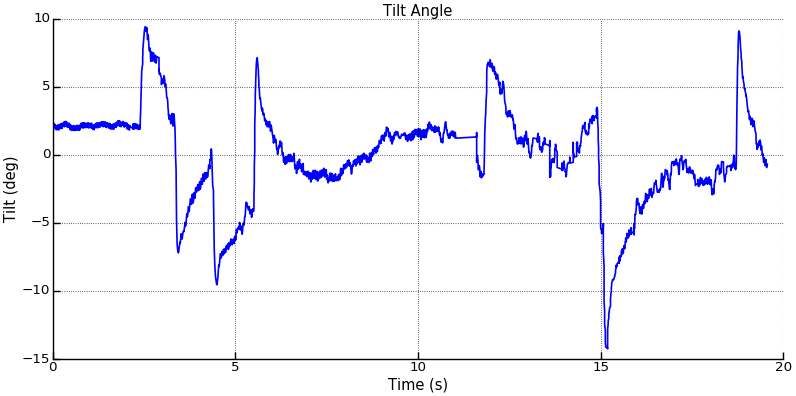

In [7]:
%matplotlib inline
cfg = pc['measured_tilt'].copy()
cfg['runs'] = ['drive_around']
make_static_plot(df, cfg, 'TiltVsTime')

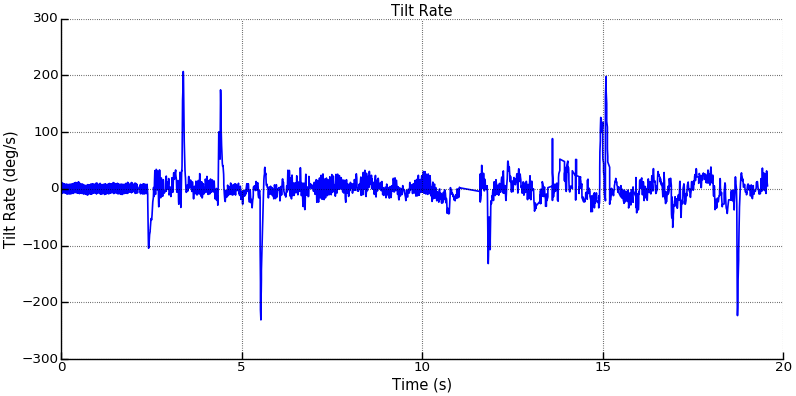

In [8]:
%matplotlib inline
cfg = pc['measured_tilt_rate'].copy()
cfg['runs'] = ['drive_around']
make_static_plot(df, cfg, 'TiltRateVsTime')

### Heading and Turn Rate

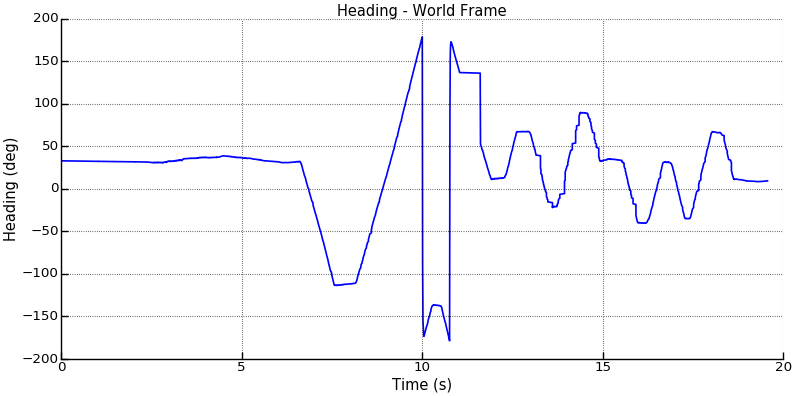

In [9]:
%matplotlib inline
cfg = pc['heading'].copy()
cfg['runs'] = ['drive_around']
make_static_plot(df, cfg, 'HeadingVsTime')

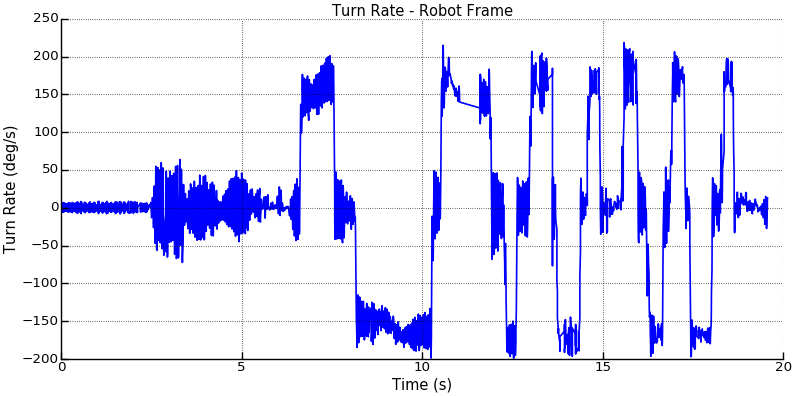

In [5]:
%matplotlib inline
cfg = pc['turn_rate'].copy()
cfg['runs'] = ['drive_around']
make_static_plot(df, cfg, 'TurnRateVsTime')

### Wheel Velocities

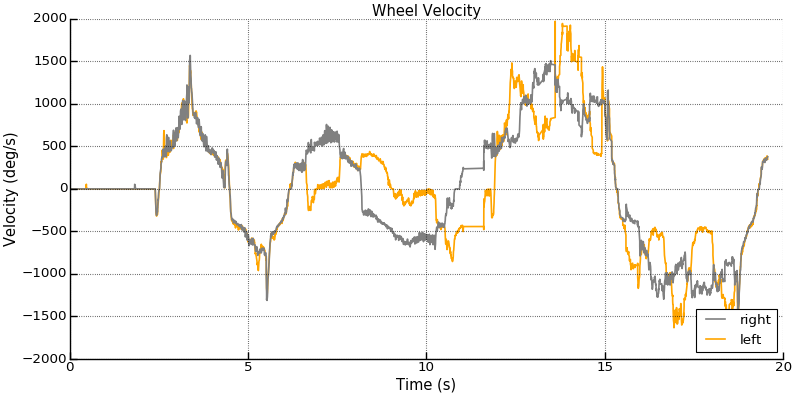

In [6]:
%matplotlib inline
cfg = pc['wheel_vel'].copy()
cfg['run'] = 'drive_around'
make_static_plot(df, cfg, 'WheelVelocities', plot_func=coplot_vars_for_run)

## Gyroscope Filtering

### Turn Rate LPF

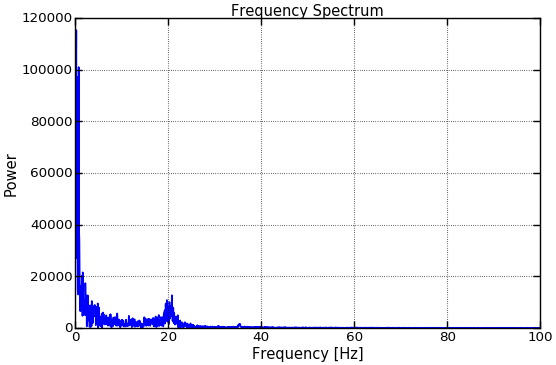

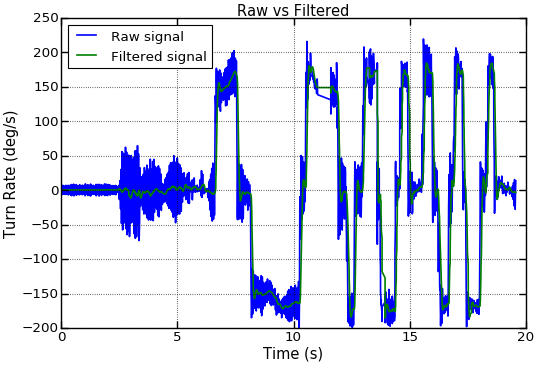

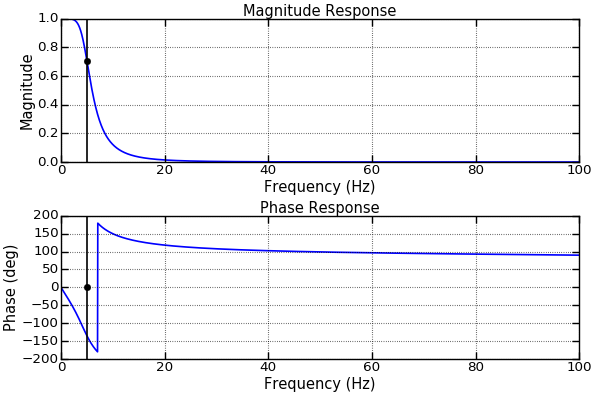

In [16]:
%matplotlib inline
cfg = pc['lp_filter_freq_response'].copy()
#cfg['run'] = 'turn_testing'
cfg['run'] = 'drive_around'
cfg['cutoff_freq'] = 5.0
cfg['filter_order'] = 3
cfg['raw_signal'] = 'bobble_bobble_balance_controller_bb_controller_status__MeasuredTurnRate'
lowpass_design_for_run(df, cfg, 'TurnRateLPF', height=10, width=15)

### Tilt Rate LPF

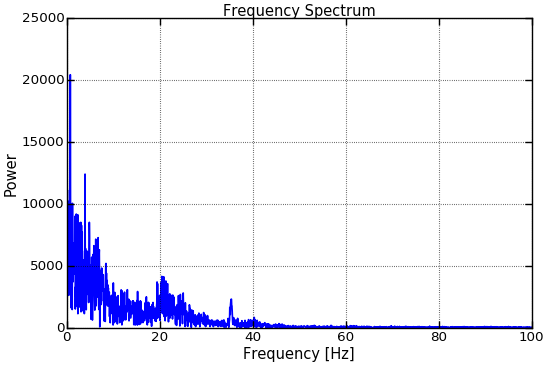

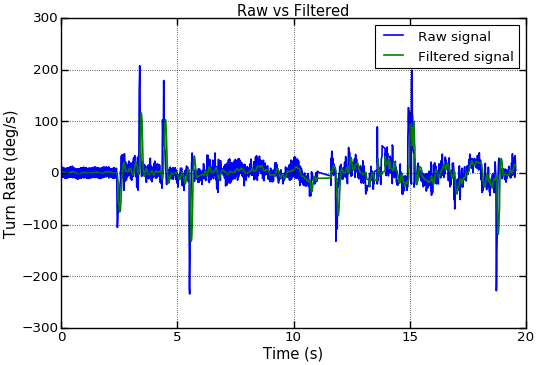

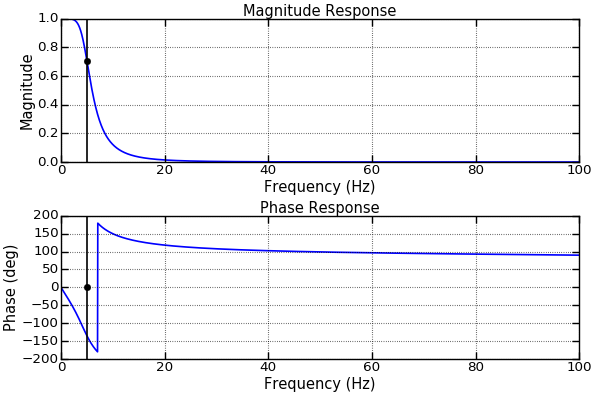

In [17]:
%matplotlib inline
cfg = pc['lp_filter_freq_response'].copy()
#cfg['run'] = 'turn_testing'
cfg['run'] = 'drive_around'
cfg['cutoff_freq'] = 5.0
cfg['filter_order'] = 3
cfg['raw_signal'] = 'bobble_bobble_balance_controller_bb_controller_status__MeasuredTiltDot'
lowpass_design_for_run(df, cfg, 'TiltRateLPF', height=10, width=15)